
# Project: Investigate TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I will conduct analysis on the TMDb movie dataset, which contains information on 10,000 movies dating to 1960. The dataset includes budget, revenue, genres and viewer ratings, among other variables. I will analyze three variables: adjusted revenues, average rating based on viewer voting and the ratio of revenue to budget, ie ´the efficiency ratio´. I will determine the top ten films in each variable category and compare them to each other. The anlysis seeks to provide insight on the characteristics of movies which may be more likely to be succesful in business terms (revenue and efficiency) or favorability with the public (viewer rating).

*The first step is to import Pandas and Matplotlib to conduct the necessary analysis and visualizations.* 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling


### General Properties

*I load the database and proceed with an initial exploration.* 

In [3]:
df=pd.read_csv('movies.csv')

In [4]:
df.shape

(10866, 21)

*The database has 10866 rows (indvidual movies) and 21 columns (variables)*

In [5]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


*The variables 'cast', 'genres' and 'production_companies' are separated by the pipe ('|') sign. I only need 'genres' for this analysis. I will also use 'revenue_adj' and 'budget_adj', the adjusted by inflation versions to facilitate comparisons over time.* 

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


*There is a problem with budget_adj and revenue_adj. They both have zero values for some movies. These will need to be eliminated as not to skew the top grossing and most efficient movies analysis.*

*I will use 'vote_average' as the proxy variable for favorability with the public. There is also a 'popularity' variable in the dataset. As we can see in the plot below, it's not as positively correlated to 'vote_average', as we would have expected. Furthermore, 'vote_average' is positioned next to 'vote_count' in the data set, which shows there are "N" observations behind the calculation. This seems more in line with a Rotten_Tomatoes-type of voter rating. As we will see later, the films with the highest "vote_average" score are those expected in a "best films of all time" list.* 

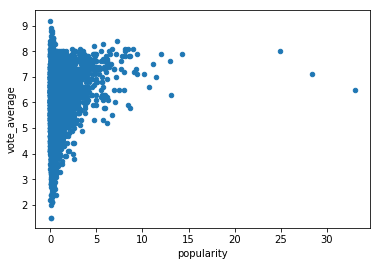

In [6]:
df.plot(x='popularity', y='vote_average', kind='scatter');

In [7]:
df['genres'].nunique()

2039

*There are 2039 unique combinations of the variable genre. Some movies have 4 or 5 genres. Hence, insights regarding the profitability of one genre versus others need to be caveated. A very succesful movie that belongs to both a "very popular" genre and a "not so popular" one will raise the averages of the "not so popular one" regarding its nearest neighbors. However, it does provide some insight into the genres that, on average, seem to be featured the most in high grossing films, fan favorites and efficient films (ie low-budget hits). Hence, we will use it in the analysis.* 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

*Numerical variables that lend themselves to statistical analysis are either integers or floats. Hence, the data types are correct. There are several string variables that have missing values: 'Cast', 'Homepage', 'Tagline', 'Keywords' and 'Production Companies'. These are not needed for the analysis and do not have to be cleaned. If for instance, one wanted to know the most represented actor in the data base, 'Cast' would have to be split by the '|' sign.*

*Lastly, I want to check the consistency of the database in time. For instance, if it has more information in recent years, it's probable that the information from last century, could be showing survival bias. That is, the few films in the database have complete information because they were the best films of their time and proper records were kept. This would be particularly important for revenues and vote average. Films that are rated tend to be truly classics.'

In [6]:
count_by_year=df.groupby('release_year').count()['revenue_adj']

In [7]:
count_by_year

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    490
2011    540
2012    588
2013    659
2014    700
2015    629
Name: revenue_adj, dtype: int64

*As expected, there are 20 times more movies registered in 2015 than in 1960. Hence, a time comparison could be skewed because of possible survival bias. A way around this would be to take a shorter timeline. However, determining which is the base year would probably be arbitrary. The millenial mark could possibly be such arbitrary line. Nevertheless, I have chosen to focus on the 10 top performers in the categories previously outline. I will discuss the impacts and limitations of those choices in the conclusion section of the report.*  

### Data Cleaning
*As we saw in the previous section, the variable 'genres' has 23 missing values. These will have to be dropped, for comparability purposes. In order to calculate the efficiency ratio as revenue_adj/budget_adj, we need to make sure that non of the the movies has a zero for either of these variables. We also need to separate the 'genres' variable into individual genres. For this, I will create dummy variables for each genre. This way, these can be added up while executing different analysis.* 

 *We start out by dropping the NaN in 'genres'.*

In [10]:
df1=df.dropna(subset=['genres'])

In [11]:
df1.shape

(10843, 21)

*23 movies were eliminated. Next, I create dummy variables for each genre.*

In [12]:
genres_col=df1.genres.str.get_dummies('|');
genres_col.head(2)

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [65]:
genres_col.shape

(10843, 20)

*I've created a dataframe that can be merged to df1, with 20 individual genres.*

In [13]:
df2=df1.merge(genres_col, left_index=True, right_index=True)

In [14]:
df2.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,0,0,0,0,0,1,0,1,0,0
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,0,0,0,0,0,1,0,1,0,0


In [15]:
df2.shape

(10843, 41)

*Df2 has the original 10843 movies, 21 variables and 20 new dummy variables.** 

**Now, we must purge movies with zeroes for both revenue_adj and budget_rev. However, previous inspection of the database shows that certain movies have very small budgets. This is likely an error in the data. Hence, I will put a floor of at least USD 1 mm in terms of revenue and budget as a way to limit outliers likely caused by faulty data.**

In [16]:
df2revzero = df2.query('revenue_adj > 1000000')
df2revzero.shape

(4336, 41)

*There are 4336 movies were the revenue_adj variable is higher than USD 1 mm.*

In [17]:
df3=df2.query('revenue_adj > 1000000')

In [18]:
df3.shape

(4336, 41)

*The new dataframe, df3, correctly keeps 4336 movies with 41 variables.* 

In [19]:
df3budzero = df3.query('budget_adj > 1000000')
df3budzero.shape

(3547, 41)

*There are 3547 movies in the new data frame that have budgets above USD 1 mm. We lost 789 movies.*

In [20]:
df4=df3.query('budget_adj > 1000000')
df4.shape

(3547, 41)

*Df4 indeed has the expected shape, 3547 movies and 41 variables. We want to make sure that the 'vote average' variable does not have zero values.* 

In [21]:
df4['vote_average'].describe()

count    3547.000000
mean        6.187708
std         0.785408
min         3.300000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

*The minimum value for this variable is 3.3. Therefore, there are no zero values.*

*The final step is to create an efficiency  ratio as revenue_adj/budget_adj.*

In [22]:
efficiency=df4['revenue_adj']/df4['budget_adj']

In [23]:
efficiency

0         10.090192
1          2.522909
2          2.683984
3         10.340891
4          7.927628
5          3.947782
6          2.842603
7          5.512781
8         15.631499
9          4.878335
10         3.594590
11         1.045385
12         2.457961
13         2.768603
14         5.017985
15         3.540003
16         6.786905
17         3.989247
18         5.708962
19         4.065771
20         1.100188
21         3.056994
22         4.277189
23        14.241287
24         4.762375
25         4.548868
26         3.174465
27         4.985212
28         4.417324
29         5.102573
            ...    
10689     12.835969
10690     19.904181
10691      7.980136
10692      5.348214
10716      0.600000
10724     11.710642
10725     17.051482
10727     12.440292
10728      0.102279
10755     30.302295
10756      9.394200
10757     84.615385
10758      5.458509
10759    233.333333
10760     52.222222
10762      3.333333
10770     15.217391
10771      7.617855
10775      1.838394


*The data is complete with 3547 movies. I will add this column to df4 to have a clean data frame to conduct the analysis. I will convert this array to a dataframe to merge with df4.*

In [24]:
efficient=pd.DataFrame(efficiency)

In [25]:
cleandf=df4.merge(efficient, left_index=True, right_index=True)

In [26]:
cleandf.shape

(3547, 42)

*The shape of the frame is correct. It has the same amount of movies and one more column than df4.*

In [27]:
cleandf.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,0
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,0,0,0,0,1,0,1,0,0,10.090192
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,0,0,0,0,1,0,1,0,0,2.522909


*The column has been merged at the end, but doesn't have a name. Let's rename it 'efficiency'.*

In [28]:
cleandf.rename(columns={0:'efficiency'}, inplace=True) 

In [29]:
cleandf.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,efficiency
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,0,0,0,0,1,0,1,0,0,10.090192
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,0,0,0,0,1,0,1,0,0,2.522909


In [30]:
cleandf.shape

(3547, 42)

In [31]:
count_by_yearc=cleandf.groupby('release_year').count()['revenue_adj']

In [32]:
count_by_yearc

release_year
1960      5
1961     10
1962      7
1963      6
1964      7
1965      5
1966      5
1967     13
1968      9
1969      4
1970     11
1971     13
1972      7
1973     12
1974     12
1975      9
1976     15
1977     17
1978     16
1979     15
1980     23
1981     27
1982     25
1983     30
1984     42
1985     39
1986     47
1987     44
1988     56
1989     50
1990     49
1991     49
1992     51
1993     65
1994     58
1995     74
1996     79
1997     88
1998     89
1999    109
2000    104
2001    113
2002    119
2003    112
2004    135
2005    148
2006    155
2007    147
2008    157
2009    157
2010    151
2011    165
2012    137
2013    162
2014    149
2015    144
Name: revenue_adj, dtype: int64

*The data cleansing process has erased 7319 movies. The largest purge on the dataframe was established with the floor for revenue of USD 1 million (6507 movies dropped). However, this is strictly necessary to conduct the cuantitative analysis that follows.*

In [33]:
cleandf.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,efficiency
count,3547.000000,3547.000000,3.547000e+03,3.547000e+03,3547.000000,3547.000000,3547.000000,3547.000000,3.547000e+03,3.547000e+03,...,3547.000000,3547.000000,3547.000000,3547.000000,3547.000000,3547.000000,3547.000000,3547.000000,3547.000000,3547.000000
mean,37898.941359,1.253377,3.988495e+07,1.166014e+08,110.024246,565.041162,6.187708,2000.901325,4.747421e+07,1.483720e+08,...,0.113053,0.036087,0.089935,0.171976,0.136735,0.000282,0.312659,0.031858,0.014096,4.276533
std,65649.972407,1.519424,4.284864e+07,1.811851e+08,19.610576,906.942382,0.785408,11.416899,4.514659e+07,2.215209e+08,...,0.316703,0.186533,0.286129,0.377413,0.343616,0.016791,0.463642,0.175646,0.117905,9.753165
min,5.000000,0.010335,2.000000e+05,5.027580e+05,26.000000,10.000000,3.300000,1960.000000,1.002810e+06,1.001273e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017098
25%,5173.000000,0.496044,1.200000e+07,1.860869e+07,96.000000,82.000000,5.700000,1995.000000,1.620656e+07,2.518352e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.025916
50%,10956.000000,0.869474,2.500000e+07,5.288202e+07,106.000000,231.000000,6.200000,2004.000000,3.283968e+07,7.128227e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.219763
75%,35739.500000,1.455553,5.100000e+07,1.365106e+08,120.000000,622.500000,6.700000,2010.000000,6.439674e+07,1.766233e+08,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.218053
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,248.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,250.000000


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which are the top 10 grossing movies of all time? 

*This section will identify the top 10 movies of all time and provide insight on characteristics such as most popular genres within this set and their average viewer score. We start the analysis with a table view of the top 10 grossing films.*


In [167]:
top_grossing=cleandf.nlargest(10,'revenue_adj')

In [98]:
top_grossing[['original_title','release_year', 'genres', 'vote_average','revenue_adj', 'efficiency', 'vote_count']]

,original_title,release_year,genres,vote_average,revenue_adj,efficiency,vote_count
1386,Avatar,2009,Action|Adventure|Fantasy|Science Fiction,7.1,2.827124e+09,11.736312,8458
1329,Star Wars,1977,Adventure|Action|Science Fiction,7.9,2.789712e+09,70.490728,4428
5231,Titanic,1997,Drama|Romance|Thriller,7.3,2.506406e+09,9.225171,4654
10594,The Exorcist,1973,Drama|Horror|Thriller,7.2,2.167325e+09,55.163268,1113
9806,Jaws,1975,Horror|Thriller|Adventure,7.3,1.907006e+09,67.236286,1415
3,Star Wars: The Force Awakens,2015,Action|Adventure|Science Fiction|Fantasy,7.5,1.902723e+09,10.340891,5292
8889,E.T. the Extra-Terrestrial,1982,Science Fiction|Adventure|Family|Fantasy,7.2,1.791694e+09,75.515291,1830
8094,The Net,1995,Crime|Drama|Mystery|Thriller|Action,5.6,1.583050e+09,50.285439,201
10110,One Hundred and One Dalmatians,1961,Adventure|Animation|Comedy|Family,6.6,1.574815e+09,53.970003,913
4361,The Avengers,2012,Science Fiction|Action|Adventure,7.3,1.443191e+09,6.907081,8903


**The names on the list make sense, except for The Net and One Hundred and One Dalmatians. I Google searched this and it's not accurate. However, if this same code is run on the original database, both movies appear in the top 10. Therefore, this is a potential error in the data. I will discount this fact to continue the analysis. Let's graph this table to make it more visual.**

*First, create a new dataframe sorted by revenue, descending*

In [88]:
top_sorted=top_grossing.sort_values('revenue_adj', ascending=False)

*Create a revenue array.*

In [89]:
rev_top=top_sorted['revenue_adj']

*Create a title array. Since it's previously sorted, it's in the same order as the revenue array.*

In [90]:
title_top=top_sorted['original_title']

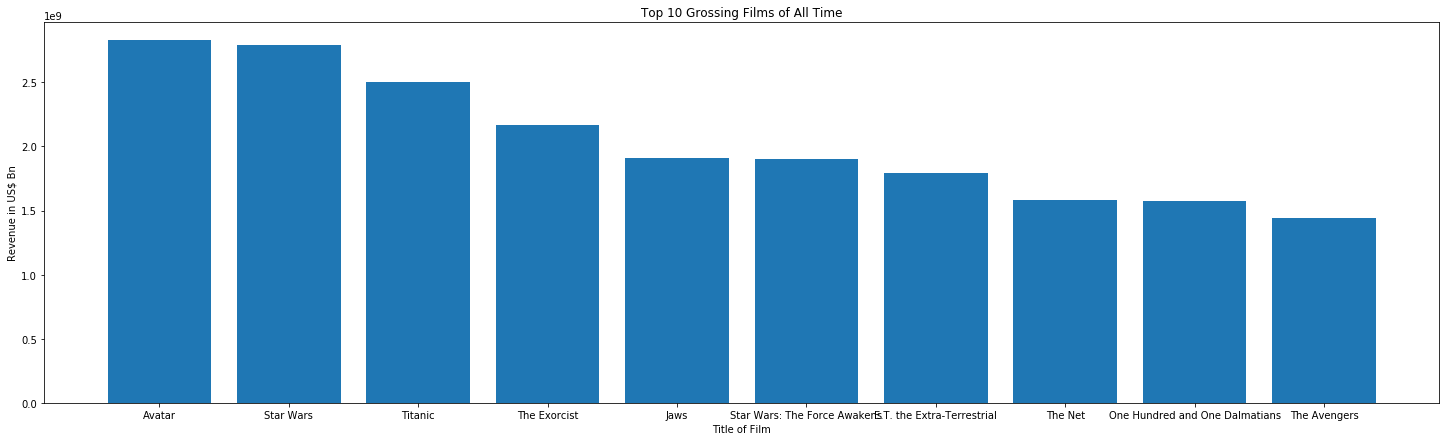

In [91]:
locations=[1,2,3,4,5,6,7,8,9,10]
heights = rev_top
labels= title_top
plt.figure(figsize=(25,7))
plt.bar(locations, heights, tick_label=labels)
plt.title('Top 10 Grossing Films of All Time')
plt.xlabel('Title of Film')
plt.ylabel('Revenue in US$ Bn');

**1) Avatar is the highest grossing film of all time, *until 2015*. Revenue for this subset ranges from USD 2.82 to 1.44 billion, with a mean of 2.04 billion. The mean for the entire dataset is USD 148 million and the median USD 71.3 million.**

In [92]:
top_grossing.revenue_adj.mean()

2049304562.1538162

In [103]:
cleandf.revenue_adj.mean()

148372018.41233003

In [120]:
cleandf.revenue_adj.median()

71282266.867035002

**2)The mean vote average for the highest grossing films is 7.1, which is in the 88th percentile of the dataset.** 

In [93]:
top_grossing.vote_average.mean()

7.0999999999999996

In [197]:
percentile=cleandf['vote_average']

In [198]:
percentile.quantile(0.88)

7.1

**It we plot vote_average vs revenu, it's hard to determine a relationship between them. Yet most high grossing films have a rating above 7.1, which is in the 88th percentile.**

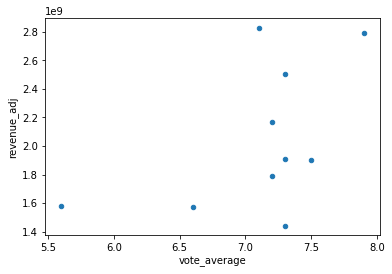

In [94]:
top_grossing.plot(x='vote_average', y='revenue_adj', kind='scatter');

*I expand the dataframe to the top 50 grossing movies to observe this relationship better*

In [95]:
top_grossing50=cleandf.nlargest(50,'revenue_adj')

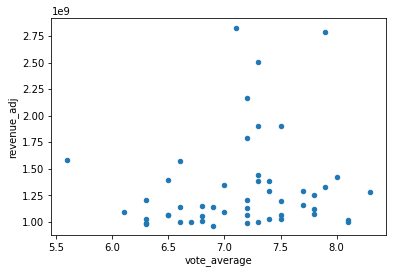

In [96]:
top_grossing50.plot(x='vote_average', y='revenue_adj', kind='scatter');

**The expanded dataset can't confirm a positive relationship between vote_average and revenue.**

**Finally, these films have had an average of 3720 votes per movie rating.**

In [97]:
top_grossing.vote_count.mean()

3720.6999999999998

**3) The mean efficiency ratio is 41.09, with a range between 6.91 and 75.51. For every dollar invested, on average, these films got 41 in return. The two films mentioned above as potentially erroneous raise the average. Yet, older films like Jaws, ET and the original Star Wars have a higher impact. Newer films such as Avatar, The Avengers and The Force Awakens have had tremendous success in the box office, yet their budgets were quite high because of computer generated imagery (CGI). Hence their return on investment is not as high as the older films.**    

In [99]:
top_grossing[['original_title','efficiency']]

,original_title,efficiency
1386,Avatar,11.736312
1329,Star Wars,70.490728
5231,Titanic,9.225171
10594,The Exorcist,55.163268
9806,Jaws,67.236286
3,Star Wars: The Force Awakens,10.340891
8889,E.T. the Extra-Terrestrial,75.515291
8094,The Net,50.285439
10110,One Hundred and One Dalmatians,53.970003
4361,The Avengers,6.907081


In [100]:
top_grossing.efficiency.mean()

41.087047017032752

In [101]:
top_grossing.efficiency.max()

75.515290857142929

In [102]:
top_grossing.efficiency.min()

6.9070814090909085

**4) The table at the begining shows that Action, Adventure and Science Fiction seem to be the most common genres in the top 10. Since there are multiple genres asigned to a film, a colored pie chart could show a clearer picture of the most relevant generates. We'll need to count the dummy variables. The mean of the column, multiplied by the amount of observations (10) will give us how many times that genre is present in the dataframe.**

In [26]:
df_mean=top_grossing[['Action', 'Adventure','Animation','Comedy','Crime','Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance','Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']].mean() 

In [48]:
df_mean

Action             0.5
Adventure          0.7
Animation          0.1
Comedy             0.1
Crime              0.1
Documentary        0.0
Drama              0.3
Family             0.2
Fantasy            0.3
Foreign            0.0
History            0.0
Horror             0.2
Music              0.0
Mystery            0.1
Romance            0.1
Science Fiction    0.5
TV Movie           0.0
Thriller           0.4
War                0.0
Western            0.0
dtype: float64

In [27]:
gen_num= df_mean*10

*I will also change it from a float to an integer to make it easier to understand*

In [28]:
gen_num=gen_num.astype(int)

*Finally, we want to see how many times each genre is represented in the dataframe*

In [29]:
gen_num

Action             5
Adventure          7
Animation          1
Comedy             1
Crime              1
Documentary        0
Drama              3
Family             2
Fantasy            3
Foreign            0
History            0
Horror             2
Music              0
Mystery            1
Romance            1
Science Fiction    5
TV Movie           0
Thriller           4
War                0
Western            0
dtype: int64

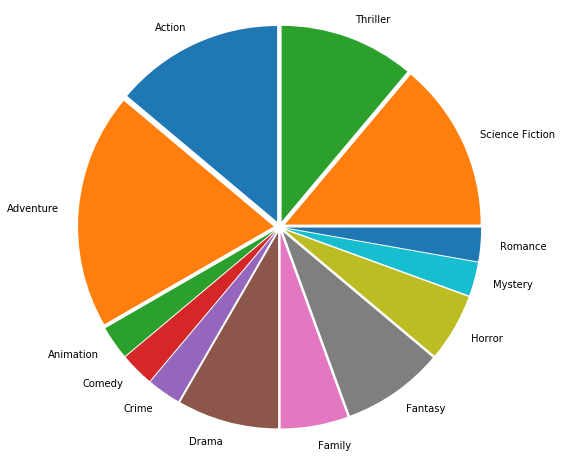

In [30]:
#For graphing, I will exclude zeros. 
labels = ['Action', 'Adventure','Animation','Comedy','Crime', 'Drama', 'Family', 'Fantasy', 'Horror', 'Mystery', 'Romance','Science Fiction', 'Thriller']
sizes = [5, 7, 1, 1, 1, 3, 2, 3, 2, 1, 1, 5, 4]
explode = (0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03)

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, explode=explode, labels=labels, startangle=90, )
ax1.axis('equal') 

plt.show()

**In conclusion, Adventure, Science Fiction and Action are the most popular genres in the top 10 grossing films.** 

### Research Question 2:  Which are the top 10 best rated films in the database?

*The first step is to create a dataframe with the highest rated films in the database* 

In [104]:
bestmv=cleandf.nlargest(10,'vote_average')

In [105]:
bestmv[['original_title','release_year', 'genres', 'vote_average','revenue_adj', 'efficiency']]

,original_title,release_year,genres,vote_average,revenue_adj,efficiency
4178,The Shawshank Redemption,1994,Drama|Crime,8.4,4.169346e+07,1.133659
7948,Stop Making Sense,1984,Documentary|Music,8.4,1.045097e+07,4.149102
7269,The Godfather,1972,Drama|Crime,8.3,1.277914e+09,40.844402
650,Whiplash,2014,Drama|Music,8.2,1.288891e+07,4.240331
2409,Fight Club,1999,Drama,8.1,1.320229e+08,1.600853
2875,The Dark Knight,2008,Drama|Action|Crime|Thriller,8.1,1.014733e+09,5.415794
4177,Pulp Fiction,1994,Thriller|Crime,8.1,3.147131e+08,26.741095
4179,Forrest Gump,1994,Comedy|Drama|Romance,8.1,9.973333e+08,12.326280
9758,The Godfather: Part II,1974,Drama|Crime,8.1,2.102479e+08,3.657142
10222,Schindler's List,1993,Drama|History|War,8.1,4.849410e+08,14.602989


**The names on the list make sense, as some are generally considered to be the best movies of all times. Let's graph this table to make it more visual.**

*First, create a new dataframe sorted by vote_average, descending*

In [106]:
best_sorted=bestmv.sort_values('vote_average', ascending=False)

*Create a vote_average array.*

In [107]:
vote_best=best_sorted['vote_average']

*Create a title array. Since it's previously sorted, it's in the same order as the revenue array.*

In [108]:
title_best=best_sorted['original_title']

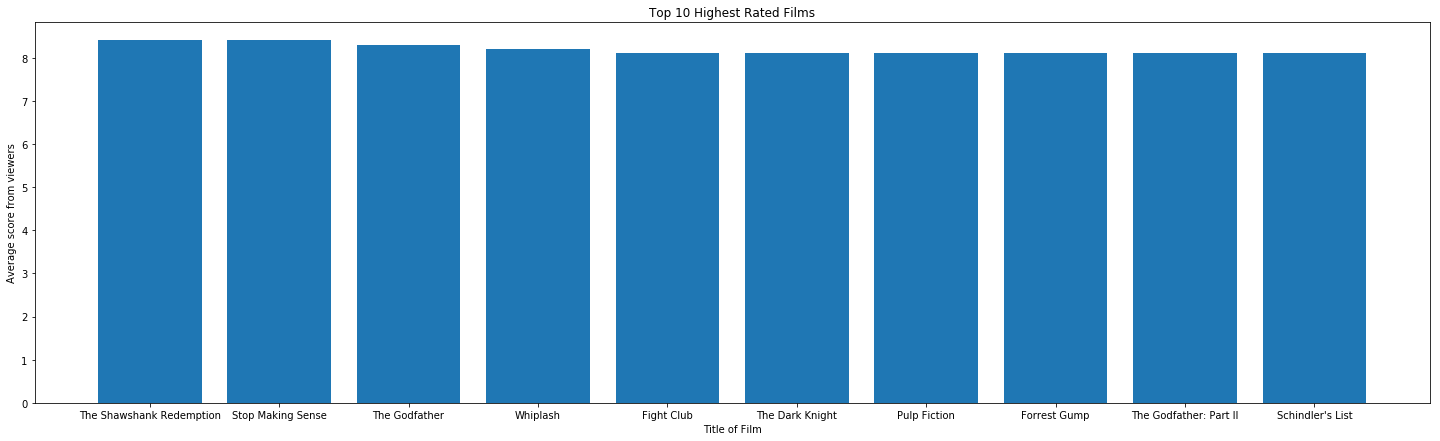

In [200]:
locations=[1,2,3,4,5,6,7,8,9,10]
heights = vote_best
labels= title_best
plt.figure(figsize=(25,7))
plt.bar(locations, heights, tick_label=labels)
plt.title('Top 10 Highest Rated Films')
plt.xlabel('Title of Film')
plt.ylabel('Average score from viewers');

**1) The Shawshank Redemption and Stop Making Sense are the highest rated film by viewers. Both have a score of 8.4.The average score of this group of films is 8.19. The range is between 8.1 and 8.4. It is 2 points higher than the average and median for the total database at 6.2.** 

In [118]:
bestmv.vote_average.mean()

8.1899999999999977

In [114]:
cleandf.vote_average.mean()

6.187707922187764

In [116]:
cleandf.vote_average.median()

6.2000000000000002

**As we see in the scatterplot, it's hard to determine a relationship between vote_average and box office revenue. Various movies have made less than USD 200 million.**

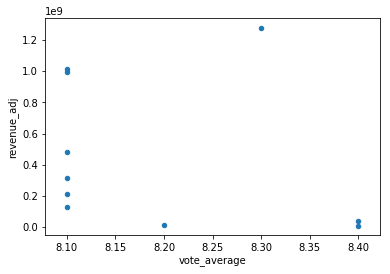

In [110]:
bestmv.plot(x='vote_average', y='revenue_adj', kind='scatter');

**If we reproduce the same scatterplot but with the best 50 films, the results are similar. Higher rating doesn't necessarily point to higher revenues.**

In [111]:
bestmv50=cleandf.nlargest(50,'vote_average')

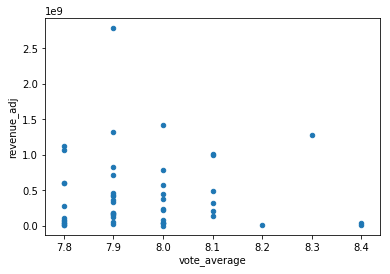

In [112]:
bestmv50.plot(x='vote_average', y='revenue_adj', kind='scatter');

**2) The mean revenue for this group is USD 449.7 million, substantially less than the top 10 grossing films, yet substantially higher than the mean and median for the entire dataset,USD 148 and 71 mm respectively. Revenues for this group vary substantially, ranging from 10.5 million to 1.278 Billion. As we can see from the firts table, The Godfather is the highest grossing of the top rated films.** 

In [41]:
bestmv.revenue_adj.mean()

449693835.53914964

In [42]:
bestmv.revenue_adj.min()

10450966.587868599

In [43]:
bestmv.revenue_adj.max()

1277913732.38977

**3) The efficiency ratio ranges from 1.13 to 40.84, with a mean of 11.47. This ratio is substantially lower than in the case of the top grossing films. That is, despite being highly rated they are less profitable than the top 10 grossing films. This is an interesting finding. The average amount of voters for this group is 4143 vs 3720 in the top grossing films. The "N" is large enough as to not expect skewing. Nevertheless, people who vote on Rotten Tomatoes or TMDb tend to be more enthusiastic about cinema, on average. Some films are referred to as *cult clasics* like Stop Making Sense, Fight Club or Pulp Fiction. Raters would have seen them, loved them and rated accordingly. Yet the vast majority of the public, which votes at the box office, hasn't.**

In [44]:
bestmv[['original_title', 'efficiency', 'vote_count']]

,original_title,efficiency,vote_count
4178,The Shawshank Redemption,1.133659,5754
7948,Stop Making Sense,4.149102,23
7269,The Godfather,40.844402,3970
650,Whiplash,4.240331,2372
2409,Fight Club,1.600853,5923
2875,The Dark Knight,5.415794,8432
4177,Pulp Fiction,26.741095,5343
4179,Forrest Gump,12.326280,4856
9758,The Godfather: Part II,3.657142,2131
10222,Schindler's List,14.602989,2632


In [45]:
bestmv.efficiency.mean()

11.471164664474017

In [46]:
bestmv.efficiency.max()

40.844401833333265

In [47]:
bestmv.efficiency.min()

1.1336587600000014

In [48]:
bestmv.vote_count.mean()

4143.6000000000004

**4) The description table shows that Drama seems to be the most common genre among the top rated films. A visual will confirm this. I will sum accross dummies, as done in the previous section.** 

In [49]:
df_meanbmv=bestmv[['Action', 'Adventure','Animation','Comedy','Crime','Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance','Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']].mean() 

In [50]:
df_meanbmv

Action             0.1
Adventure          0.0
Animation          0.0
Comedy             0.1
Crime              0.5
Documentary        0.1
Drama              0.8
Family             0.0
Fantasy            0.0
Foreign            0.0
History            0.1
Horror             0.0
Music              0.2
Mystery            0.0
Romance            0.1
Science Fiction    0.0
TV Movie           0.0
Thriller           0.2
War                0.1
Western            0.0
dtype: float64

In [51]:
gen_numbmv= df_meanbmv*10

In [52]:
gen_numbmv=gen_numbmv.astype(int)

In [53]:
gen_numbmv

Action             1
Adventure          0
Animation          0
Comedy             1
Crime              5
Documentary        1
Drama              8
Family             0
Fantasy            0
Foreign            0
History            1
Horror             0
Music              2
Mystery            0
Romance            1
Science Fiction    0
TV Movie           0
Thriller           2
War                1
Western            0
dtype: int64

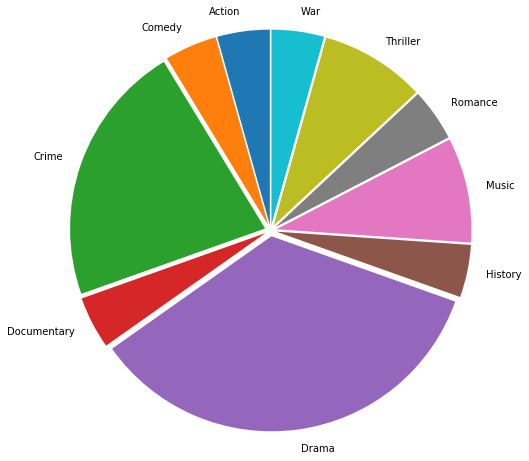

In [54]:
#For graphing, I will exclude zeros. 
labels = ['Action', 'Comedy','Crime', 'Documentary', 'Drama', 'History', 'Music', 'Romance','Thriller', 'War']
sizes = [1, 1, 5, 1, 8, 1, 2, 1, 2, 1]
explode = (0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03)

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, explode=explode, labels=labels, startangle=90, )
ax1.axis('equal') 

plt.show()

**Drama and Crime are the most popular genres among the top rated films.**

### Research Question 3: Which 10 films have the highest return on investment (ROI) in the database?

*Films with the highest returns on investment are, generally, surprise hits. They substantially outperform their budgets and exceed expectations because of the cult following they develop. The first step in the analysis is to create a dataframe with the top 10 films in terms of efficiency.*

In [168]:
toproi=cleandf.nlargest(10,'efficiency')

In [169]:
toproi[['original_title','release_year', 'genres', 'vote_average','revenue_adj', 'budget_adj', 'efficiency']]

,original_title,release_year,genres,vote_average,revenue_adj,budget_adj,efficiency
7827,Mad Max,1979,Adventure|Action|Thriller|Science Fiction,6.5,3.004554e+08,1.201822e+06,250.000000
10759,Halloween,1978,Horror|Thriller,7.3,2.339890e+08,1.002810e+06,233.333333
10606,American Graffiti,1973,Comedy|Drama,6.5,5.647834e+08,3.815971e+06,148.005148
7316,Friday the 13th,1980,Horror,6.4,1.581129e+08,1.455320e+06,108.644729
10174,Rocky,1976,Drama,7.2,4.492097e+08,4.214868e+06,106.577406
10597,Enter the Dragon,1973,Crime|Thriller|Action,7.0,4.420044e+08,4.174486e+06,105.882353
9808,The Rocky Horror Picture Show,1975,Comedy|Horror|Music|Science Fiction,7.1,4.574195e+08,4.862185e+06,94.076933
7011,Saw,2004,Horror|Mystery|Crime,7.1,1.199603e+08,1.385334e+06,86.593058
10757,Dawn of the Dead,1978,Horror,7.2,1.838485e+08,2.172755e+06,84.615385
8897,48 Hrs.,1982,Thriller|Action|Comedy|Crime|Drama,6.1,1.782146e+08,2.259642e+06,78.868508


In [123]:
toproi.efficiency.mean()

129.65968523495891

In [125]:
cleandf.efficiency.mean()

4.2765325991128149

In [126]:
cleandf.efficiency.median()

2.2197626400000057

**The list seems to be inline with what I expected. Films like Rocky, Mad Max, Halloween and American Graffiti developed a cult following, having been re-released in theaters several times. Furthemore, they were inexpensive to make, as they are from the 70s, when CGI wasn't such an important part of movie making.**

**1) Mad Max has had the highest return on investment, with an efficiency ratio of 250. The top 10 films in this category have and average efficiency ratio of 129, while the average for the entire database is 4.27 and the median 2.22. There is quite a bit of dispersion in the ratio among the top 10 films as we can see in the graph below. The max value is 250, while the min is 78.9**

In [128]:
toproi_sorted=toproi.sort_values('efficiency', ascending=False)

In [129]:
roi=toproi_sorted['efficiency']

In [130]:
title_roi=toproi_sorted['original_title']

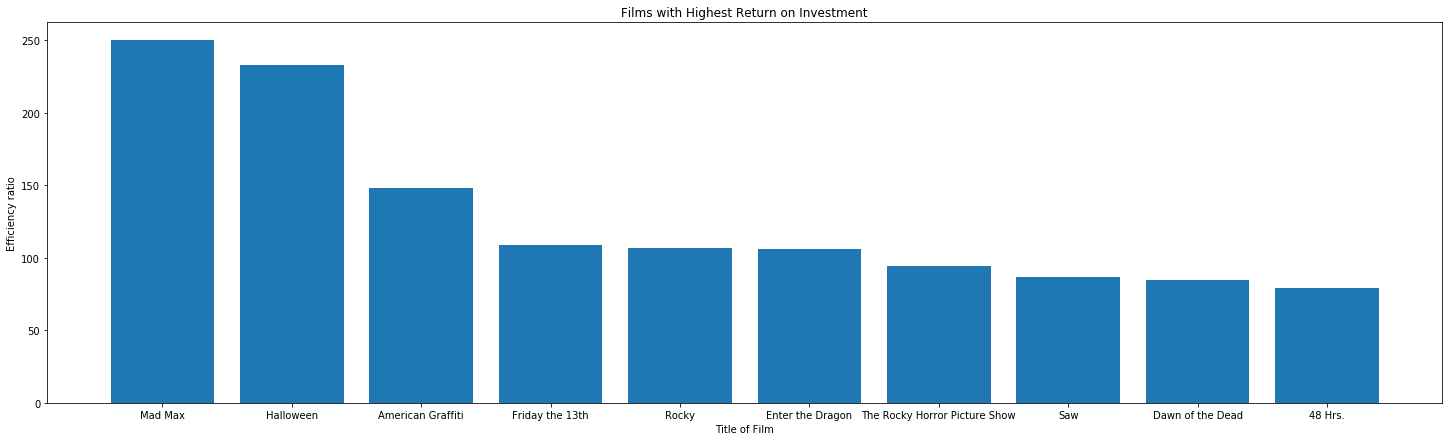

In [132]:
locations=[1,2,3,4,5,6,7,8,9,10]
heights = roi
labels= title_roi
plt.figure(figsize=(25,7))
plt.bar(locations, heights, tick_label=labels)
plt.title('Films with Highest Return on Investment')
plt.xlabel('Title of Film')
plt.ylabel('Efficiency ratio');

**2) Regarding revenue, the mean is below that of the highest rated films, at USD 308.8mm, ranging from USD 120.0 mm to USD 564.8. However, what makes this group so profitable is their low budget. The mean budget for this group is USD 2.65mm and the median is USD 2.1mm, whereas the mean for the entire database is USD 47.5 mm and the median is USD 32.8 mm.** 

In [138]:
toproi.revenue_adj.max()

564783351.56192005

In [139]:
toproi.revenue_adj.mean()

308799771.42524624

In [140]:
toproi.revenue_adj.min()

119960348.263852

In [144]:
toproi.budget_adj.mean()

2654519.4230106631

In [147]:
toproi.budget_adj.median()

2216198.9271226749

In [145]:
cleandf.budget_adj.mean()

47474205.974595599

In [146]:
cleandf.budget_adj.median()

32839679.966372102

**3) Regarding viewer ratings, the vote average score of thes ten films ranges from 6.1 to 7.3, with a mean of 6.84, 0.6 above the average and mean of the entire dataset. It is not possible to distinguish a positive relationship between vote average and efficiency, even when expanding the sample to 50 movies.**

In [134]:
toproi.vote_average.mean()

6.8400000000000007

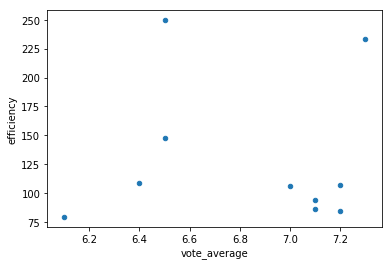

In [133]:
toproi.plot(x='vote_average', y='efficiency', kind='scatter');

In [135]:
roi50=cleandf.nlargest(50,'efficiency')

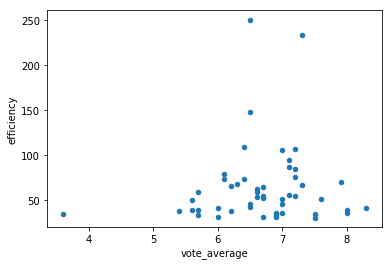

In [136]:
roi50.plot(x='vote_average', y='efficiency', kind='scatter');

**4) It's difficult to spot the most common genre among the top rated films from the description table. A visual will confirm this. I will sum accross dummies, as done in the previous section.** 

In [171]:
df_meanroi=toproi[['Action', 'Adventure','Animation','Comedy','Crime','Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance','Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']].mean() 

In [172]:
gen_numroi= df_meanroi*10

In [174]:
gen_numroi.astype(int)

Action             3
Adventure          1
Animation          0
Comedy             3
Crime              3
Documentary        0
Drama              3
Family             0
Fantasy            0
Foreign            0
History            0
Horror             5
Music              1
Mystery            1
Romance            0
Science Fiction    2
TV Movie           0
Thriller           4
War                0
Western            0
dtype: int64

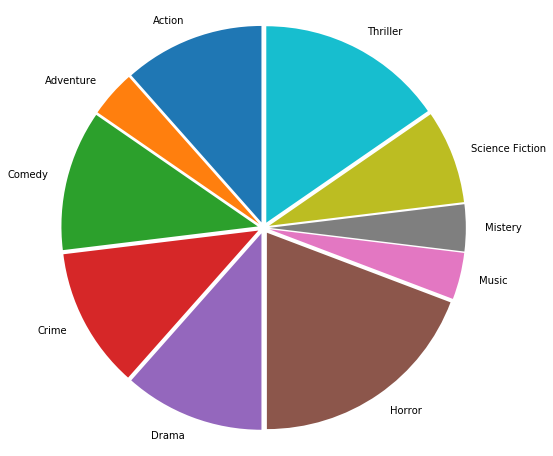

In [176]:
#For graphing, I will exclude zeros. 
labels = ['Action', 'Adventure', 'Comedy','Crime', 'Drama', 'Horror', 'Music', 'Mistery', 'Science Fiction','Thriller']
sizes = [3, 1, 3, 3, 3, 5, 1, 1, 2, 4]
explode = (0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03)

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, explode=explode, labels=labels, startangle=90, )
ax1.axis('equal') 

plt.show()

**The distribution of genres seems to be more even than in the previous two groups. Nevertheless, Horror and Thriller are the most popular genres.**

<a id='conclusions'></a>
## Conclusions


**The results of this analysis are based on the steps taken in during the data cleaning process. For instance, the final list of top 10 grossing films or highest rated films could have changed had I not dropped movies withoud genres or with budgets below USD 1 million. Nevertheless, unlike in other cases, replacing with average values makes no sense for budgets or revenues, and genres can't be assigned randomly.**   

**The final analysis was conducted on more than 3500 movies, a sizable number. The results for top grossing movies are what we would have expected, except for two movies 'The Net' and 'One Hundred and One Dalmatians'. A quick Google search confirms they do not belong on this list. As discussed above, both movies appear in the top 10 even in the original database. The highest rated films are also, for the most part what we would have expected, as some are considered to be the best movies ever made. Limiting the database to those with adjusted budget above 1 million was a necessary cut-off to calculate the efficiency ratio. Without this minimun, the top 10 was made of nearly infinite numbers because the budgets were non-zero, yet minuscule numbers. Establishing this floor purged an additional 789 movies with adjusted revenue data. This could have altered averages, means, medians and percentiles for the adjusted revenue analysis section.**

**Nevertheless, mistakes in the data are to be expected. Therefore, the averages, medians and percentiles expressed in this report could not be exact. For instance, I decided a floor value of USD 1 million for revenue_adj and budget_adj, but movies close to those values could also have inexact or underreported information.** 

**High grossing films are complete outliers in terms of revenue, even when compared to the highest rated films or the surprise hits. Average revenue is more than 5 times that of the 10 best rated films and 28 times the median revenue for the database. Conversely, the highest rated films can also generate considerable revenues, 6 times above the median**. 

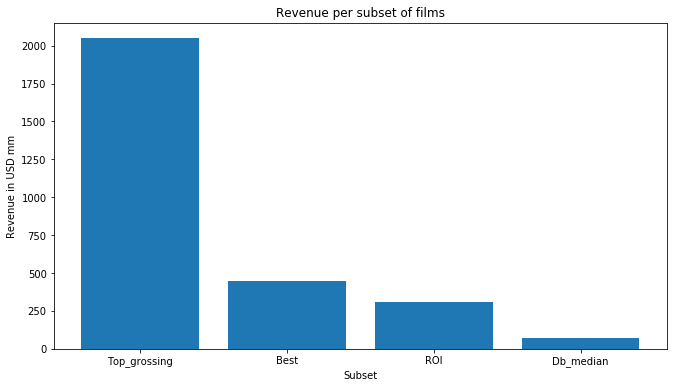

In [182]:
locations=[1,2,3,4]
heights = [2049, 450, 309, 72]
labels= ['Top_grossing', 'Best', 'ROI', 'Db_median']
plt.figure(figsize=(11,6))
plt.bar(locations, heights, tick_label=labels)
plt.title('Revenue per subset of films')
plt.xlabel('Subset')
plt.ylabel('Revenue in USD mm');

**We can determine if the difference between the means of the subsets and the mean of the dataset are statistically significant at the 95% confidence level. We do this to determine if the mean of each subset is statistically different than that of the whole database, which allows us to test the hypothesis in the analysis The standard deviation for revenue for the database is 221 million and the mean 148 million. To test difference at the 95% level, we need to add 2 times the stdev to the mean (590). If this number is lower than the values of the mean of the subset, the difference in means is statistically significant. This is the case only for the top grossing firms. The difference in means is not statistically significant with the Best subset or the ROI subset. The shorthand for interpreting the results is that the means for Best and ROI are not statistically that different from the whole database, but Top_grossing is.**

**High grossing films are so profitable that they are still pretty efficient. Their average efficiency ratio is 41. The most efficient films are 3 times more efficient than the highest grossing. Even so, the top grossers are stil 20 times more efficient in terms of return on investment than the median film in the database. Hence, the incentive for executives to pursue the production of blockbusters is very strong.** 

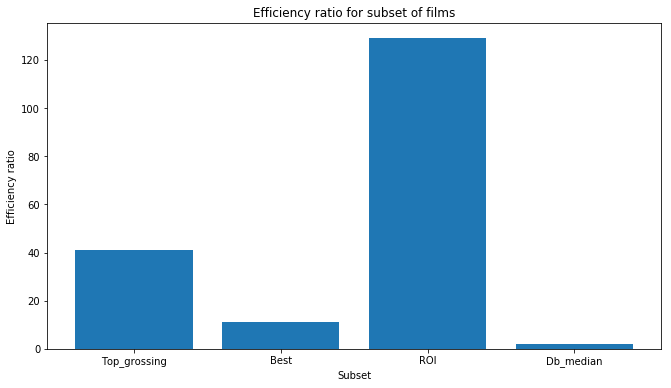

In [187]:
locations=[1,2,3,4]
heights = [41, 11, 129, 2]
labels= ['Top_grossing', 'Best', 'ROI', 'Db_median']
plt.figure(figsize=(11,6))
plt.bar(locations, heights, tick_label=labels)
plt.title('Efficiency ratio for subset of films')
plt.xlabel('Subset')
plt.ylabel('Efficiency ratio');

**Highest grossing films also have high average scores from viewers. The rating score for the highest grossing films is in the 88th percentile. Hence, they are perceived as having very good quality.**

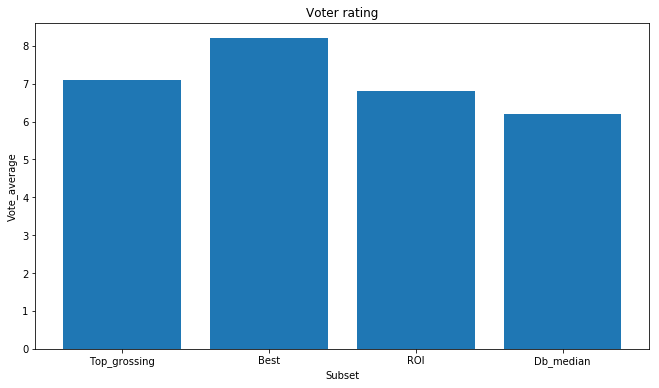

In [188]:
locations=[1,2,3,4]
heights = [7.1, 8.2, 6.8, 6.2]
labels= ['Top_grossing', 'Best', 'ROI', 'Db_median']
plt.figure(figsize=(11,6))
plt.bar(locations, heights, tick_label=labels)
plt.title('Voter rating')
plt.xlabel('Subset')
plt.ylabel('Vote_average');

**Finally, the most common genres for the top grossing films are Adventure, Action and Science Fiction. The most common genres for the best rated films are Drama and Crime, while its Horror and Thrillers for the best ROI films. These findings are in line with expectations. Big blockbusters tend to have a Sci-Fi/Action component since Star Wars started the trend. Better perceived films in terms of art are generally from the dramatic genre, where actors use their skills extensively. Finally, low-budget horror films that strike a chord with audiences have started various franchises and have been very profitable over time.**  

**In order to determine if these differences are statistically significant, difference in means test can be conducted. The standard deviation for revenue is 221 million for the database and the mean 148. To test difference at the 95% level, we need to add 2 times the stdev to the mean (590). The mean of revenue for top grossing films (2094) is larger than that of the data base  at the 95% confidence level. Similar calculations can be done for  

In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0